In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('ADANIPORTS.csv')
df.head()
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


### Description of all column
#### 1. Date: The date of the stock market data.
#### 2. Symbol: The stock symbol (ticker) for the company, which is "ADANIPORTS".
#### 3. Series: The series of the stock (typically "EQ" for equity shares).
#### 4. Prev Close: The previous day's closing price.
#### 5. Open: The opening price on the given day.
#### 6. High: The highest price reached during the day.
#### 7. Low: The lowest price reached during the day.
#### 8. Last: The last traded price before the market closed.
#### 9. Close: The closing price on the given day.
#### 10. VWAP: Volume Weighted Average Price.
#### 11. Volume: The total number of shares traded during the day.
#### 12. Turnover: The total turnover (in currency) during the day.
#### 13. Trades: The number of trades executed (some rows have missing values).
#### 14. Deliverable Volume: The number of shares that were actually delivered on the day.
#### 15. %Deliverble: The percentage of deliverable volume relative to the total traded volume.


### Data preprocessing 

In [3]:
# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# convert the 'Date' column as the index
df.set_index('Date', inplace=True)

### Doing EDA using different graph

#### Plot Closing Prices Over Time

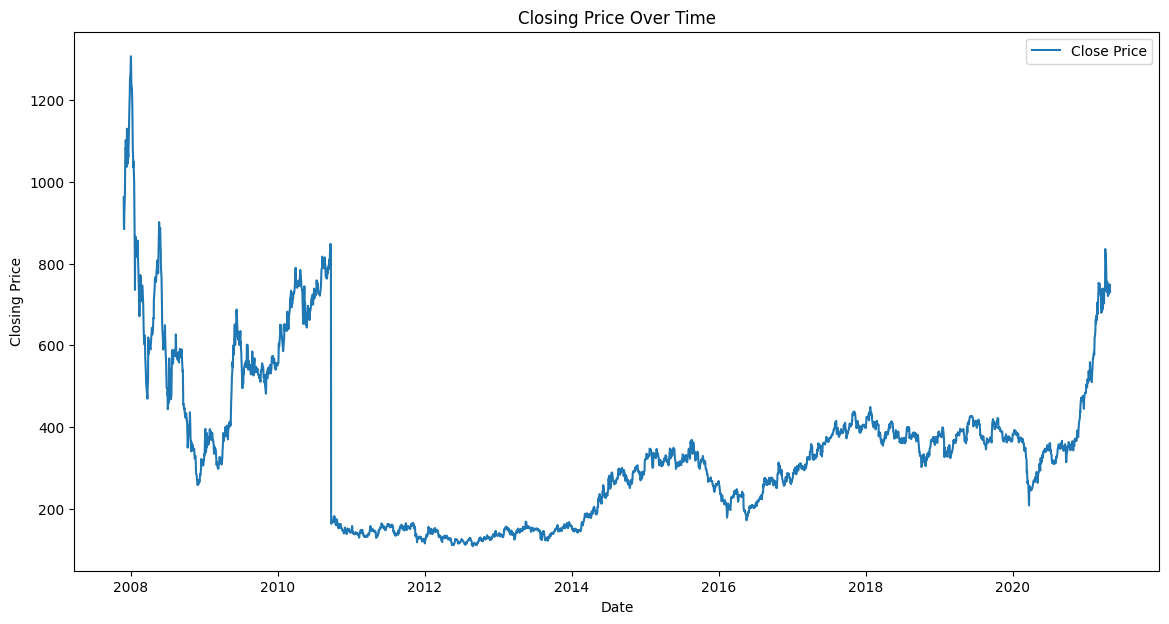

In [4]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

####  Plot Moving Averages

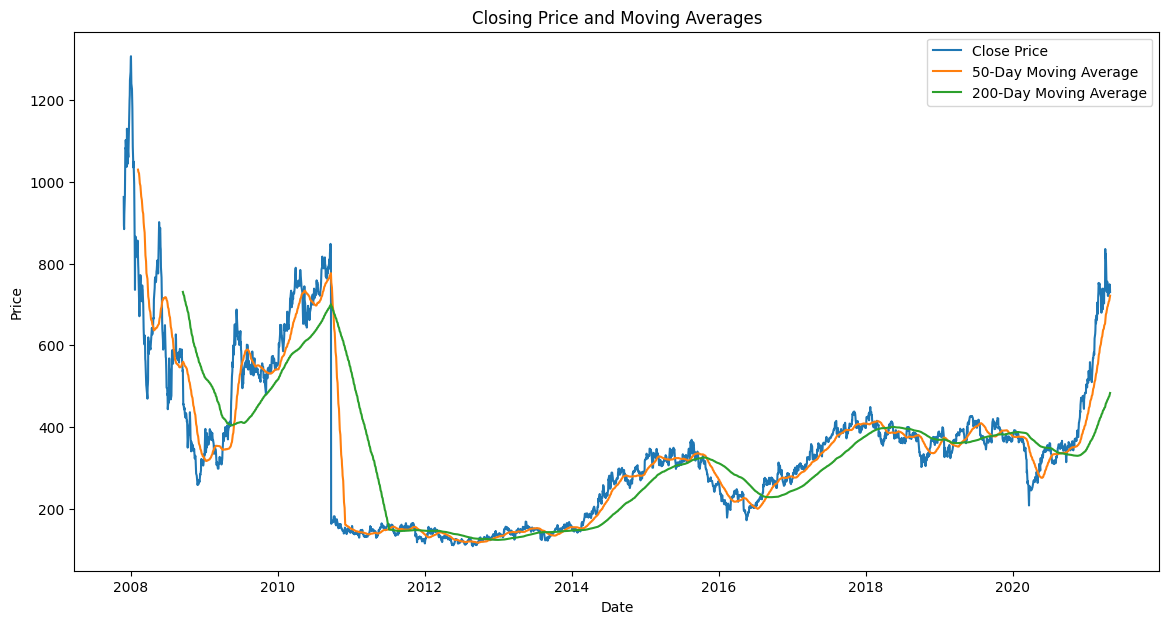

In [5]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day Moving Average')
plt.plot(df['MA200'], label='200-Day Moving Average')
plt.title('Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

####  Plot Volume Over Time

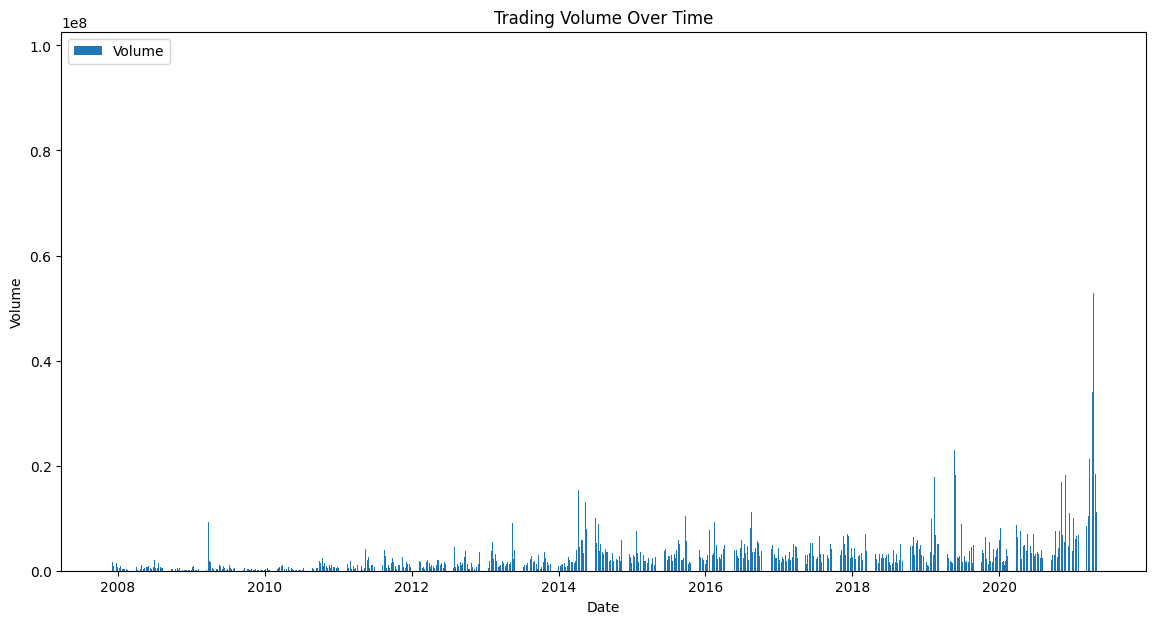

In [6]:
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

#### Heatmap of Correlations

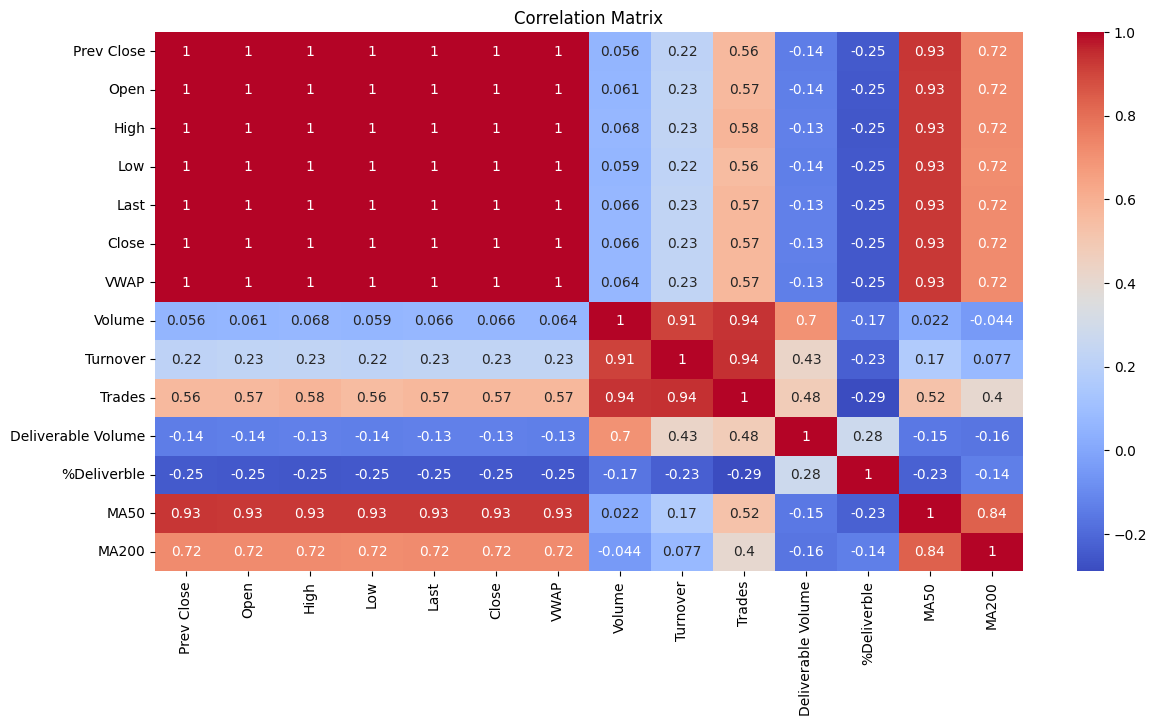

In [7]:
# Filter out non-numerical columns
numerical_data = df.select_dtypes(include=[np.number])

# computing the correlation matrix
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Preprocess the Data

#### For simplicity, we will use the closing price for forecasting and create lagged features to use as predictors.

In [8]:
# Create lagged features
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['Lag3'] = df['Close'].shift(3)
df.dropna(inplace=True)

### Spliting the Data into training and testing sets.

In [9]:
# Features and target variable
X = df[['Lag1', 'Lag2', 'Lag3']]
y = df['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Train the Model

#### Linear Regression

In [10]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

####  Make Predictions and Evaluate the Model

In [11]:
# Make predictions
lr_pred = lr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, lr_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 126.53129834193707

Root Mean Squared Error: 11.248613174162275


#### Decision Tree Regressor

In [12]:
# Initialize the model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Calculate the mean squared error
dt_mse = mean_squared_error(y_test, dt_pred)
print(f'Decision Tree Mean Squared Error: {dt_mse}')

# Calculate the Root Mean Squared Error
dt_rmse = np.sqrt(dt_mse)
print(f'Decision Tree Root Mean Squared Error: {dt_rmse}')

Decision Tree Mean Squared Error: 9285.211844512196

Decision Tree Root Mean Squared Error: 96.3598040912921


#### Random Forest Regressor

In [13]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate the mean squared error
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')

# Calculate the Root Mean Squared Error
rf_rmse = np.sqrt(rf_mse)
print(f'Random Forest Root Mean Squared Error: {rf_rmse}')

Random Forest Mean Squared Error: 9157.391249011169

Random Forest Root Mean Squared Error: 95.69425922703603


#### Support Vector Regressor

In [14]:
# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
svr_pred = svr_model.predict(X_test)

# Calculate the mean squared error
svr_mse = mean_squared_error(y_test, svr_pred)
print(f'Support Vector Regressor Mean Squared Error: {svr_mse}')

# Calculate the Root Mean Squared Error
svr_rmse = np.sqrt(svr_mse)
print(f'Support Vector Regressor Root Mean Squared Error: {svr_rmse}')

Support Vector Regressor Mean Squared Error: 26091.093664357242

Support Vector Regressor Root Mean Squared Error: 161.52737744530256


### Visualize the Forecast

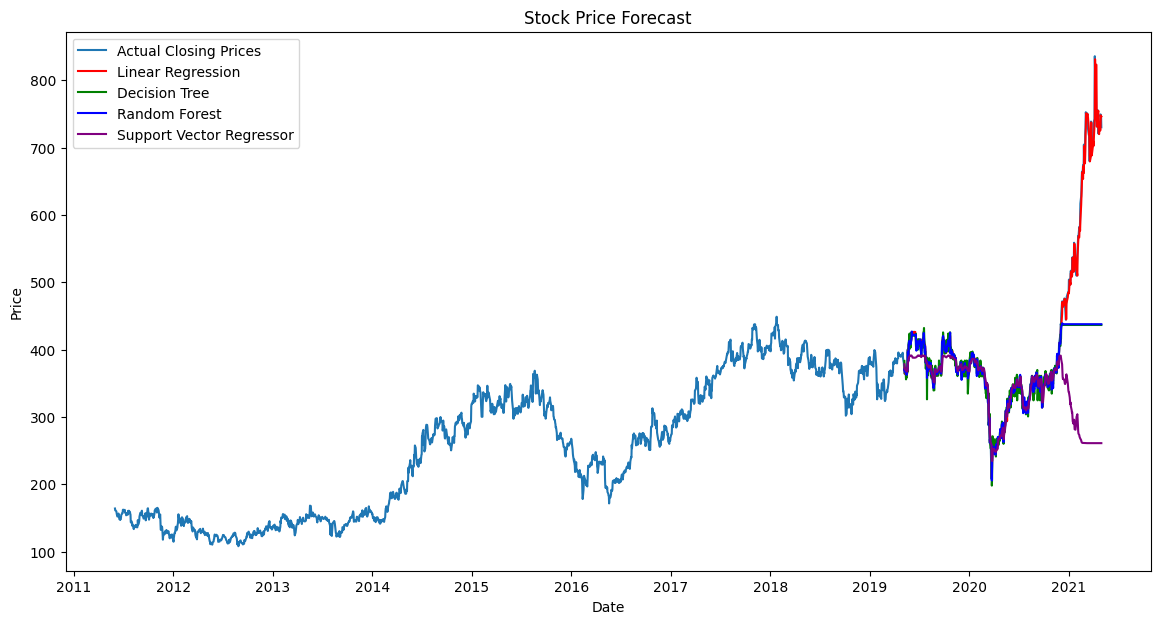

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Closing Prices')

# Plot predictions for each model
plt.plot(X_test.index, lr_pred, label='Linear Regression', color='red')
plt.plot(X_test.index, dt_pred, label='Decision Tree', color='green')
plt.plot(X_test.index, rf_pred, label='Random Forest', color='blue')
plt.plot(X_test.index, svr_pred, label='Support Vector Regressor', color='purple')

plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### It seems like our models is not doing very good on closing price is so we choose some different feature to do the forcasting 

### Feature Engineering

In [16]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['Volatility'] = df['Close'].rolling(window=10).std()
df['Returns'] = df['Close'].pct_change()
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['Lag3'] = df['Close'].shift(3)


In [17]:
# Droping NA values after feature engineering
df.dropna(inplace=True)

In [18]:
# Selecting features and target variable
features = ['MA10', 'MA50', 'Volatility', 'Returns', 'Lag1', 'Lag2', 'Lag3', 'Volume']
X = df[features]
y = df['Close']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Initializeing different model

In [20]:
# Initialize models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor(n_estimators=100)
svr_model = SVR(kernel='rbf')


In [21]:
# Train and predict with each model
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Support Vector Regressor': svr_model
}

### Evaluateing the different Model

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'{name} RMSE: {rmse}')

Linear Regression RMSE: 6.159263832468278

Decision Tree RMSE: 97.70351090176402

Random Forest RMSE: 97.00809369359254

Support Vector Regressor RMSE: 204.79489592143685


### Visualize the Forecast

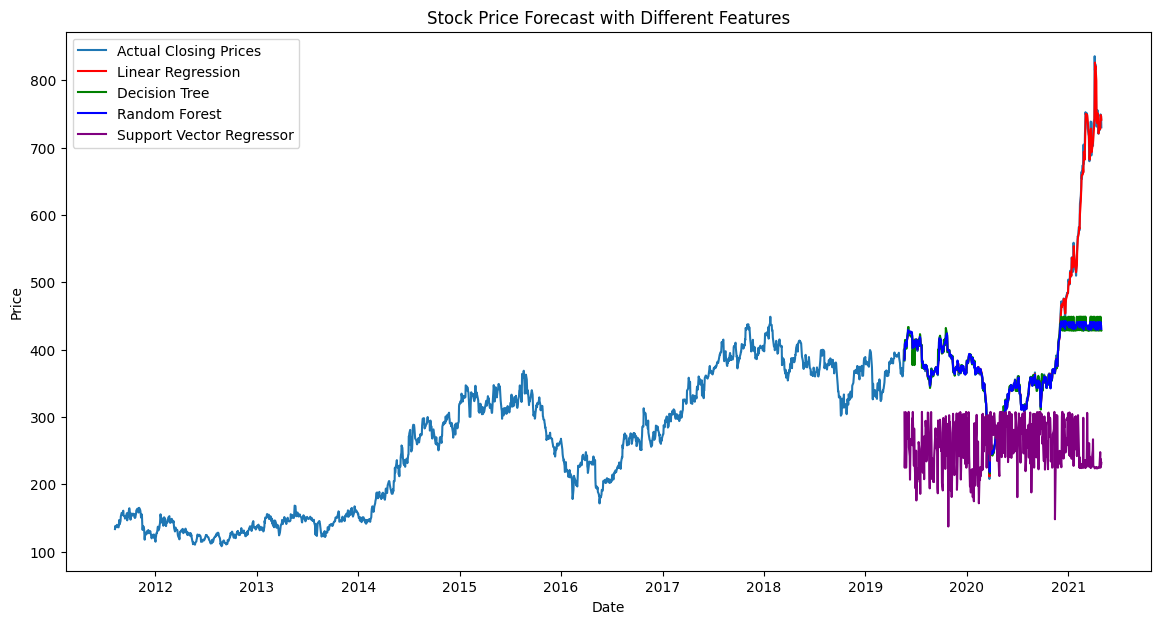

In [23]:
# Ploting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Closing Prices')

# Plot predictions for each model
colors = ['red', 'green', 'blue', 'purple']
for (name, model), color in zip(models.items(), colors):
    y_pred = model.predict(X_test)
    plt.plot(X_test.index, y_pred, label=name, color=color)

plt.title('Stock Price Forecast with Different Features')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### It seems like the linear regression is doing best out of all 4 model we use

### Forecasting the stock price for the future using linear regression

In [24]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,MA50,MA200,Lag1,Lag2,Lag3,MA10,Volatility,Returns
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,...,838079,0.0892,709.154,474.97325,725.35,737.80,720.45,744.045,30.413022,0.007445
2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,...,1779639,0.0865,712.498,477.01600,730.75,725.35,737.80,736.600,12.768668,0.025180
2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,...,1342353,0.1203,715.886,479.03150,749.15,730.75,725.35,736.760,12.890194,-0.003871
2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,...,1304895,0.0942,718.984,481.09050,746.25,749.15,730.75,738.330,13.072282,0.000670
2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,...,3514692,0.2789,721.253,483.07975,746.75,746.25,749.15,736.300,12.564633,-0.022364


In [25]:
# Define the number of days to forecast
forecast_days = 30

In [26]:
# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_days + 1, inclusive='right')
forecast_df = pd.DataFrame(index=forecast_dates, columns=df.columns)


In [27]:
# Initialize the last known values
last_known_values = df.iloc[-1].copy()

### Perform the forecasting

In [28]:
# Perform the forecasting
for date in forecast_dates:
    input_data = last_known_values[features].values

    # Ensure no NaN values in input_data
    if pd.isnull(input_data).any():
        continue

    input_data = input_data.reshape(1, -1)
        
    forecasted_close = lr_model.predict(input_data)[0]
    
    # Update the forecast_df with the forecasted values
    forecast_df.at[date, 'Close'] = forecasted_close
    forecast_df.at[date, 'Lag1'] = last_known_values['Close']
    forecast_df.at[date, 'Lag2'] = last_known_values['Lag1']
    forecast_df.at[date, 'Lag3'] = last_known_values['Lag2']
    forecast_df.at[date, 'Volume'] = last_known_values['Volume']
    
    # Calculate new features
    forecast_df['MA10'] = forecast_df['Close'].rolling(window=10).mean()
    forecast_df['MA50'] = forecast_df['Close'].rolling(window=50).mean()
    forecast_df['Volatility'] = forecast_df['Close'].rolling(window=10).std()
    forecast_df['Returns'] = forecast_df['Close'].pct_change()
    
    # Update last known values
    last_known_values = forecast_df.loc[date].copy()

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names

  warnings.warn(

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4672\1260526443.py:24: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

  forecast_df['Returns'] = forecast_df['Close'].pct_change()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4672\1260526443.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

  forecast_df['Returns'] = forecast_df['Close'].pct_change()


In [29]:
# Concatenate the original and forecasted data
full_df = pd.concat([df, forecast_df])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4672\4123913716.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

  full_df = pd.concat([df, forecast_df])


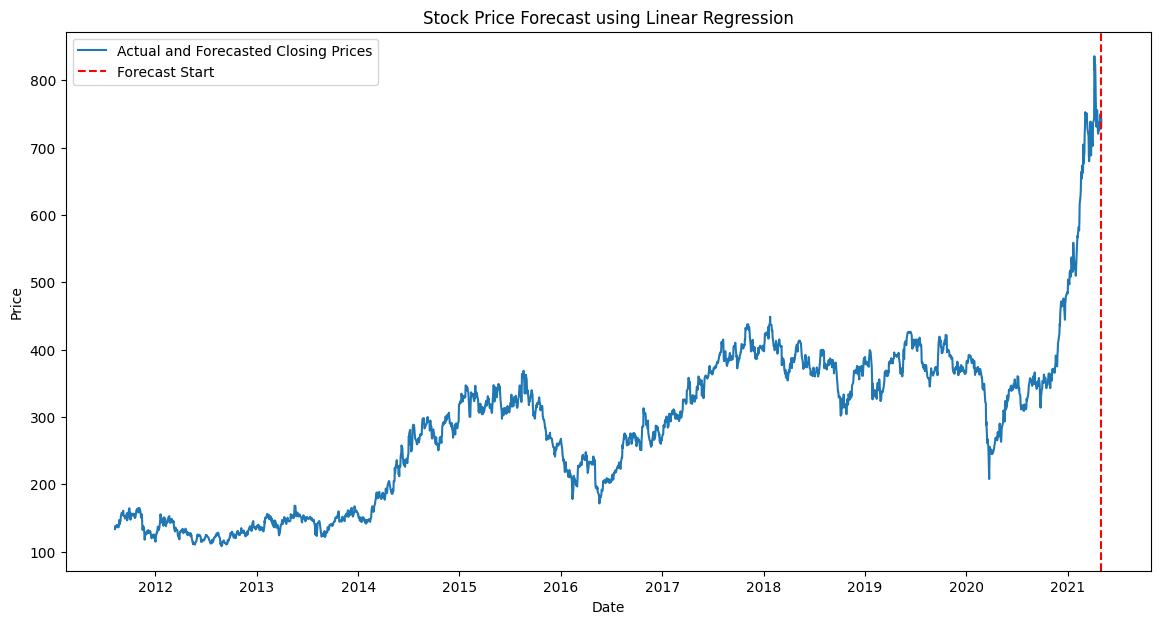

In [30]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(full_df.index, full_df['Close'], label='Actual and Forecasted Closing Prices')
plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('Stock Price Forecast using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()